In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml # introduciamo openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.class_weight import compute_class_weight

In [2]:
X, y = fetch_openml('churn', return_X_y=True, as_frame=True)

In [3]:
X.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16.0,128.0,415,2845.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1
1,35.0,107.0,415,2301.0,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1
2,31.0,137.0,415,1616.0,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0
3,35.0,84.0,408,2510.0,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2
4,36.0,75.0,415,155.0,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: category
Categories (2, object): [0, 1]

In [5]:
counts = y.value_counts()
counts

0    4293
1     707
Name: class, dtype: int64

In [57]:
counts[1] / counts[0]

0.16468669927789426

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # stratify=y, ma la differenza è poca

In [59]:
y_test.value_counts()

0    1080
1     170
Name: class, dtype: int64

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1080
           1       0.52      0.21      0.30       170

    accuracy                           0.87      1250
   macro avg       0.70      0.59      0.61      1250
weighted avg       0.84      0.87      0.84      1250



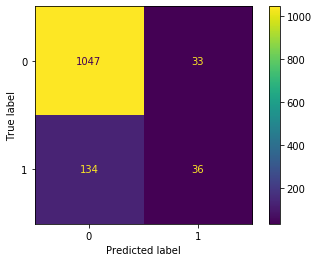

In [66]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test  = model.predict(X_test) 

# mi raccomando prima y_true!
print( classification_report(y_test, p_test) )

plot_confusion_matrix(model, X_test, y_test)

- Alcuni modelli contengono il paramtero **class_weight** che permette di pesare i record in proporzione (inversa) alla loro presenza nel dataset

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1080
           1       0.33      0.76      0.46       170

    accuracy                           0.76      1250
   macro avg       0.64      0.76      0.65      1250
weighted avg       0.87      0.76      0.79      1250



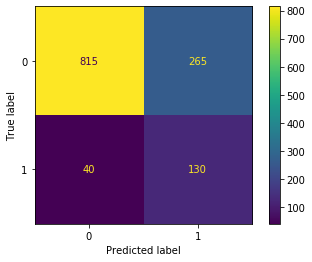

In [64]:
model = LogisticRegression(max_iter=10000, class_weight='balanced')
#model = LogisticRegression(max_iter=10000, class_weight={'0':3, '1':1})
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test  = model.predict(X_test) 

print( classification_report(y_test, p_test) )

plot_confusion_matrix(model, X_test, y_test)

In [54]:
# ecco come viene calcolata la proporzione internamente
compute_class_weight(class_weight='balanced', classes=y_train.unique(), y=y_train)

array([0.58175613, 3.55787476])

- Gli alberi di decisione sono resistenti alle classi sbilanciate, perchè i bivi dell'albero vengono costruiti in base alla purezza della separazione che producono

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1080
           1       0.71      0.71      0.71       170

    accuracy                           0.92      1250
   macro avg       0.83      0.83      0.83      1250
weighted avg       0.92      0.92      0.92      1250



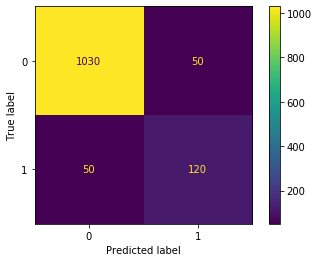

In [65]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test  = model.predict(X_test) 

print( classification_report(y_test, p_test) )

plot_confusion_matrix(model, X_test, y_test)